# Анализ работы маркетплейса

Стартап работает над созданием нового маркетплейса, который недавно появился на рынке Бразилии. Выручка по продукту стагнирует уже несколько месяцев, в связи с чем требуется проанализировать основные показателиработы маркетплейса, сформулировать и приоритизировать гипотезы по улучшению продукта, предложить метрики для проведения А/В тестов.


Основные задачи:

1. Оценить месячный retention в оформление заказа.
При помощи когортного анализа проанализировать медианный retention 1-го месяца.
Найти когорту с самым высоким retention на 3-й месяц.

2. Определить, существует ли PMF (product/market fit) у этого маркетплейса.
Если PMF есть, то в какую сторону лучше развивать продукт дальше?
Если PMF нет, то какие причины могут быть у этого?

3. Предложить 5 основных метрик, на которых продакту стоит сконцентрироваться для максимизации прибыли компании и которые отражают:
 - рост объема продаж маркетплейса;
 - объем аудитории, которой продукт доставляет ценность;
 - заинтересованность новых клиентов в продакте;
 - вовлеченность клиента в продолжение использования продукта;
 - денежное выражение вовлеченности клиента.
  
4. Отбрать и приоритизировать гипотезы.
С применением фреймворка ICE.

5. Выбрать метрики, на которые ваша гипотеза должна повлиять.
Предложить целевые, прокси и guardrail метрики.


6. Сформулировать выводы о проделанной работе.

# Загрузка и предобработка данных

In [140]:
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
import matplotlib.dates as mdates

# customers-таблица с уникальными идентификаторами пользователей


customer_id — позаказный идентификатор пользователя

customer_unique_id — уникальный идентификатор пользователя (аналог номера паспорта)

customer_zip_code_prefix — почтовый индекс пользователя

customer_city — город доставки пользователя

customer_state — штат доставки пользователя


In [3]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
# Определим размер датафрейма и проверим типы данных
print(f'shape: {customers.shape}')
print(customers.dtypes)

shape: (99441, 5)
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


In [5]:
# Проверим наличие пропусков
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
# Проверим число уникальных значений
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [7]:
# Проведём анализ территориального размещения покупателей
state_customer=customers.groupby('customer_state', as_index=False).customer_unique_id.nunique().sort_values('customer_unique_id', ascending=False)
state_customer

,customer_state,customer_unique_id
25,SP,40302
18,RJ,12384
10,MG,11259
22,RS,5277
17,PR,4882
23,SC,3534
4,BA,3277
6,DF,2075
7,ES,1964
8,GO,1952


In [8]:
city_customer=customers.groupby('customer_city', as_index=False).customer_unique_id.nunique().sort_values('customer_unique_id', ascending=False)
city_customer

,customer_city,customer_unique_id
3597,sao paulo,14984
3155,rio de janeiro,6620
453,belo horizonte,2672
558,brasilia,2069
1143,curitiba,1465
...,...,...
2767,pedranopolis,1
2768,pedrao,1
2269,matias olimpio,1
2769,pedras altas,1


По итогам анализа датафрейма customers с данными о покупателях:

1. Пропущенные значения отсутствуют
2. Число уникальных пользователей составляет 96096, в то время как число размещенных заказов (т.е. значений в поле customer_id) составляет 99441
3. Покупатели сконцентрированы в юго-восточных и южных штатах, что соответствует распределению населения, ВВП и уровня цифровизации в Бразилии. Север и Северо-Восток — зоны для потенциального роста (но требуют анализа барьеров: логистика, доходы, интернет-проникновение).
4. Маркетплейс популярен в мегаполисах и крупных городах, но также присутствует в малых населённых пунктах. Это может указывать на:
   - Широкую географическую дистрибуцию (логистика работает даже в удалённых городах).
   - Потенциальные ниши для точечного маркетинга в городах с низкой активностью.

# orders-таблица заказов


order_id — уникальный идентификатор заказа (номер чека)

customer_id — позаказный идентификатор пользователя

order_status — статус заказа

order_purchase_timestamp — время создания заказа

order_approved_at — время подтверждения оплаты заказа

order_delivered_carrier_date — время передачи заказа в логистическую службу

order_delivered_customer_date — время доставки заказа

order_estimated_delivery_date — обещанная дата доставки


# Уникальные статусы заказов в order_status:

created — создан;

approved — подтверждён;

invoiced — выставлен счёт;

processing — в процессе сборки заказа;

shipped — отгружён со склада;

delivered — доставлен пользователю;

unavailable — заказ отменён по причине недоступности товара;

canceled — отменён.

In [9]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [10]:
# Определим размер датафрейма и проверим типы данных
print(f'shape: {orders.shape}')
print(orders.dtypes)

shape: (99441, 8)
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


Даты считались некорректно, отформатируем их в тип данных дата

In [11]:
orders.order_purchase_timestamp       = pd.to_datetime(orders.order_purchase_timestamp)
orders.order_approved_at              = pd.to_datetime(orders.order_approved_at)
orders.order_delivered_carrier_date   = pd.to_datetime(orders.order_delivered_carrier_date)
orders.order_delivered_customer_date  = pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date  = pd.to_datetime(orders.order_estimated_delivery_date)

In [12]:
# Проверим наличие пропусков
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
# Проверим число уникальных значений
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [14]:
# Посмотрим за какой временной период предоставлены данные
print(f'с {orders.order_purchase_timestamp.min().strftime("%d.%m.%Y")} \
по {orders.order_purchase_timestamp.max().strftime("%d.%m.%Y")}')

с 04.09.2016 по 17.10.2018


In [15]:
# Анализ статусов заказов в маркетплейсе
status_counts = orders['order_status'].value_counts().reset_index()
status_counts.columns = ['order_status', 'order_count']
status_counts = status_counts.sort_values('order_count', ascending=False)

In [16]:
status_counts["percentage_of_the_total"]=round(status_counts["order_count"]*100/orders.order_id.nunique(),2)
status_counts

,order_status,order_count,percentage_of_the_total
0,delivered,96478,97.02
1,shipped,1107,1.11
2,canceled,625,0.63
3,unavailable,609,0.61
4,invoiced,314,0.32
5,processing,301,0.30
6,created,5,0.01
7,approved,2,0.00


In [18]:
0.63+0.61

1.24

In [17]:
# Проверим сколько всего заказов имеют пропуск хотя бы по одной колонке
orders[orders.isnull().any(axis=1)].shape[0]

2980

В системе не предусмотрены явные индикаторы, указывающие на переход заказа из одного состояния в другое. Поэтому мы будем предполагать время перехода заказа между состояниями на основе данных, содержащихся в соответствующих полях:
- order_purchase_timestamp,
- order_approved_at,
- order_delivered_carrier_date,
- order_delivered_customer_date

По итогам анализа датафрейма customers с данными о покупателях:
1. Число заказов составляет 99 441 (число строк в датафрейме orders совпадает с числом строк в фрейме customers). Из них 97.02% находятся в статусе 'delivered' (доставлено)
2. Данные охватывают информацию о заказах, сделанных с 04.09.2016 по 17.10.2018
3. Процент доставленных заказов крайне высок. Доля отмененнных заказов (без учета заказов в работе, статусы canceled+unavailable) составляет 1.24%
4. В полях order_approved_at, order_delivered_carrier_date, order_delivered_customer_date имеются пропуски. Предположительно, данные пропуски обусловлены разницей в статусах заказов, поле order_status. В датафрейме имеется 2980 строк, в которых содержится по меньшей мере один пропуск

Проанализируем пропуски данных:

In [19]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


Первые пропуски появляются в колонке order_approved_at, содержащей информацию о времени подтверждения оплаты заказа - в количестве 160. Проверим статус заказов, имеющих пропуски в этом поле

In [21]:
orders[orders.order_approved_at.isnull()].groupby('order_status').order_id.count()

order_status
canceled     141
created        5
delivered     14
Name: order_id, dtype: int64

1. Отменённые заказы (canceled — 141)
Это ожидаемый результат, если заказ отменён (особенно на раннем этапе), оплата могла не быть подтверждена.
Пропуск в order_approved_at логичен — платёж не прошёл или был отменён. 
2. Созданные заказы (created — 5)
Требует проверки. Заказы "зависли" на самом раннем этапе (не перешли в approved).
Возможные причины:
- Технические ошибки (например, сбой при создании заказа),
- Клиент создал заказ, но не завершил оплату.
3. Доставленные заказы (delivered — 14)
заказ доставлен, но время подтверждения оплаты отсутствует.
Возможные причины:
- Технический сбой, подтверждение произошло, но не записалось в БД
- Заказ мог быть обработан вручную
- Мошенничество. Доставка без подтверждения оплаты (редко, но требует проверки).

Посмотрим информацию по доставленным заказам, но с непроизведённой оплатой

In [24]:
orders[orders.order_approved_at.isnull()].query('order_status=="delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [32]:
(orders[orders.order_approved_at.isnull()]
    .query('order_status == "delivered"')
    .assign(date_only=orders.order_purchase_timestamp.dt.normalize())
    .groupby('date_only')['order_id']
    .count()
    .sort_index())

date_only
2017-01-19    2
2017-02-17    3
2017-02-18    8
2017-02-19    1
Name: order_id, dtype: int64

1. Временной период:
- Все проблемные заказы созданы в январе-феврале 2017 года
- Это может указывать на:
  - Проблемы в системе в начале работы маркетплейса
  - Тестовые/служебные заказы
  - Ошибки в процессе внедрения системы

2. Распределение по датам:
- Пик приходится на 18 февраля 2017 (8 заказов)
- Наименьшее количество - 19 февраля (1 заказ)

3. Возможные причины:
- Технические сбои при обработке платежей в указанные даты
- Особенности работы платежных систем в выходные (17-19 февраля - пятница-воскресенье)

Проверим статусы тех заказов, у которых стоят пропуске (в количестве 1783) в поле order_delivered_carrier_date - время передачи заказа в логистическую службу

In [34]:
orders[orders.order_delivered_carrier_date.isnull()].groupby('order_status').order_id.count().sort_values(ascending=False)

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_id, dtype: int64

1. unavailable - 609 отменённых заказов по причине недоступности товара - товар недоступен, логистика не требуется
2. canceled - 550 отменённых заказов - ожидаемо: заказы отменены до передачи перевозчику
3. invoiced - 314 заказа, которым выставлен счёт - ожидает оплаты/подтверждения
4. processing - 301 заказы в процессе сборки - ещё не готовы к отправке
5. created - 5 созданных товаров - только создан, не обработан
6. approved - 2 подтверждённых заказа, но не переданных в логистику
7. delivered - 2 доставленных заказа - аномалия: доставлен без отметки о передаче перевозчику

1. Нормальные случаи (ожидаемые пропуски)
- Отменённые (canceled) и недоступные (unavailable) заказы (1,159 шт.) — логично отсутствие данных о передаче перевозчику.
- На ранних этапах (created, invoiced, processing) — заказ ещё не готов к отправке.

2. Потенциальные проблемы
- 2 доставленных (delivered) заказа без отметки о передаче перевозчику:
- Возможные причины:
    - Ошибка в данных (не заполнено поле при фактической отправке).
    - Заказы доставлены без участия логистической службы (например, самовывоз).
    - Тестовые/служебные заказы.

- 2 подтверждённых (approved) заказа без дальнейшего движения:
    - Могут "висеть" в системе. Стоит проверить, почему не перешли в processing.

Для аномальных случаев (delivered, approved) находим конкретные заказы и проверяем была ли фактическая доставка (order_delivered_customer_date), возможно, в системе ошибка статуса?

In [36]:
orders[
    (orders.order_delivered_carrier_date.isnull()) & 
    (orders.order_status.isin(['delivered', 'approved']))
][['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date']]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,NaT
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-11-20 19:44:47
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,NaT
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,NaT


Только один заказ со статусом "доставлено" был действительно доставлен. Остальные заказы требуют дополнительной проверки

Проверим статусы заказов с пропусками (в количестве 2965) в колонке order_delivered_customer_date, содержащей информацию о времени доставки заказа

In [48]:
orders[orders.order_delivered_customer_date.isnull()].groupby('order_status').order_id.count().sort_values(ascending=False)

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_id, dtype: int64

1. shipped	1107 - заказы переданы перевозчику, но не отмечены как доставленные
2. canceled	619 - ожидаемо: заказ отменён до доставки
3. unavailable	609 - товар недоступен, доставка невозможна
4. invoiced	314 - ожидает оплаты/подтверждения
5. processing 301 - в процессе сборки (не готов к отправке)
6. delivered 8 - критично: статус "доставлен", но даты доставки нет
7. created	5 - только создан
8. approved	2 - подтверждён, но не передан в логистику

Заказы в статусе shipped (отгружён со склада) - 1107 - перевозчику переданы, но как доставленные не отмечены. 
Возможные причины:
- Транспортная компания не предоставила данные о доставке,
- Заказы потеряны/задержаны при доставке,
- Ошибка синхронизации данных между маркетплейсом и логистическим партнёром.

Доставленные заказы в статусе delivered без даты доставки - 8. 
Криическая аномалия: Системаная ошибка или мошенничество

Итоги анализа пропусков:
1. В 160 заказах отсутствует информация о времени подтверждения оплаты (поле order_approved_at). Это может быть связано с тем, что заказ был отменён или только что создан. Тем не менее, в 14 случаях заказы были успешно доставлены клиентам. Заказы были размещены 19.01.2017 и 17-19.02.2017. Необходимо проверить систему подтверждения оплат, возможно, произошёл сбой.
2. В В 1783 заказах не указано время передачи заказа в логистическую службу (поле order_delivered_carrier_date), что может быть связано с любым статусом заказа, кроме shipped и delivered. Всего два заказа имеют статус delivered и не содержат данных в поле order_delivered_carrier_date, что может быть незначительной ошибкой или указывать на то, что заказ был забран со склада самостоятельно.
3. В 2965 заказах не указана дата доставки клиенту (поле order_delivered_customer_date). Это может означать, что статус заказа не соответствует доставленному. Выявлено 8 заказов, которые были доставлены, но с пустой датой доставки клиенту. Это может быть связано с ошибкой при передаче информации о доставке логистической компанией.

В большинстве случаев пропуски в полях с датами соответствуют статусу заказа. В 24 заказах из 2980 строк с пропусками были выявлены отклонения от нормы, которые могут быть связаны с ошибками в системе обработки заказов и учёта оплат.

Проверим, как соотносятся между собой обещанное время доставки заказа order_estimated_delivery_date  и фактическое order_delivered_customer_date 

In [54]:
share_delayed = orders\
    .query("order_status == 'delivered' & order_estimated_delivery_date < order_delivered_customer_date").shape[0] \
    / orders.shape[0] *100

print(f'Доля заказов, доставленных с опозданием: '\
      f'{np.round(share_delayed, 2)}%')

Доля заказов, доставленных с опозданием: 7.87%


Посмотрим информацию о доставленных заказах с опозданием

In [56]:
deliv_delay_orders=orders.query("order_estimated_delivery_date < order_delivered_customer_date & order_status == 'delivered'")
deliv_delay_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02
...,...,...,...,...,...,...,...,...
99396,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16
99397,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31
99425,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09


In [78]:
deliv_delay_orders = deliv_delay_orders.copy()
deliv_delay_orders['delta_delayed']=deliv_delay_orders.order_delivered_customer_date - deliv_delay_orders.order_estimated_delivery_date
deliv_delay_orders['delta_delayed_hours']=deliv_delay_orders['delta_delayed'].dt.components['days']*24\
                                   + deliv_delay_orders['delta_delayed'].dt.components['hours']\
                                   + np.round(deliv_delay_orders['delta_delayed'].dt.components['minutes']/60,2)
deliv_delay_orders['delta_delayed_days']=np.round(deliv_delay_orders['delta_delayed_hours']/24,2)
deliv_delay_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta_delayed,delta_delayed_hours,delta_delayed_days
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,11 days 22:23:46,286.38,11.93
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,9 days 22:03:54,238.05,9.92
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,0 days 00:59:25,0.98,0.04
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,7 days 18:59:23,186.98,7.79
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,1 days 13:28:46,37.47,1.56
...,...,...,...,...,...,...,...,...,...,...,...
99396,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,5 days 00:03:26,120.05,5.00
99397,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,3 days 19:59:49,91.98,3.83
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,21 days 17:06:59,521.10,21.71
99425,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,2 days 00:48:31,48.80,2.03


Теперь определим сколько заказов опоздало, а также среднее и медианное время опоздания в днях

In [64]:
deliv_delay_orders.delta_delayed_days.describe()

count    7826.000000
mean        9.551389
std        13.952558
min         0.000000
25%         1.870000
50%         5.805000
75%        11.820000
max       188.980000
Name: delta_delayed_days, dtype: float64

Посмотрим на воронку оформления заказа

In [76]:
the_checkout_funnel=deliv_delay_orders.copy()
the_checkout_funnel['time_to_payment']=the_checkout_funnel.order_approved_at - the_checkout_funnel.order_purchase_timestamp
the_checkout_funnel['time_delivery_to_carrier']=the_checkout_funnel.order_delivered_customer_date- the_checkout_funnel.order_delivered_carrier_date
the_checkout_funnel['time_delivery_to_customer']=the_checkout_funnel.order_delivered_carrier_date- the_checkout_funnel.order_approved_at
the_checkout_funnel=the_checkout_funnel[['time_to_payment', 'time_delivery_to_carrier', 'time_delivery_to_customer']]
the_checkout_funnel

,time_to_payment,time_delivery_to_carrier,time_delivery_to_customer
20,0 days 13:32:39,3 days 04:33:43,17 days 13:45:54
25,1 days 02:43:53,22 days 23:38:32,4 days 19:54:36
35,0 days 00:15:48,27 days 01:55:29,3 days 06:48:22
41,0 days 02:53:21,14 days 21:45:18,18 days 20:52:56
57,0 days 00:50:24,19 days 12:57:27,5 days 08:50:40
...,...,...,...
99396,0 days 00:17:12,5 days 06:21:26,12 days 18:37:54
99397,0 days 00:51:31,22 days 00:32:26,0 days 20:46:55
99423,1 days 06:34:13,35 days 00:02:17,3 days 13:36:18
99425,0 days 00:18:08,19 days 03:36:33,1 days 01:06:32


In [77]:
the_checkout_funnel.describe()

,time_to_payment,time_delivery_to_carrier,time_delivery_to_customer
count,7826,7825,7825
mean,0 days 12:18:50.547406082,25 days 16:22:44.007412140,5 days 07:41:40.841533546
std,1 days 02:03:12.721577941,17 days 18:01:42.825527619,7 days 01:25:48.227726880
min,0 days 00:00:00,0 days 00:00:01,-10 days +22:53:52
25%,0 days 00:13:41,15 days 06:18:21,1 days 06:20:43
50%,0 days 00:24:48.500000,23 days 22:03:35,3 days 00:09:23
75%,0 days 19:15:19.250000,33 days 02:03:04,6 days 03:30:56
max,30 days 21:26:37,205 days 04:35:00,125 days 18:18:06


1. Среднее (медианное, далее аналогично) время оплаты составляет почти 25 минут. Возможно, сложный процесс оплаты или недостаточно вариантов оплаты.
2. Среднее время сборки заказа и передачи логистическому партнеру составляет 23 дня и 22 часа. Максимальное значение времени сборки превышает 205 дней.
3. Средний срок доставки клиенту составляет 3 дня.

Проверим, могут ли быть связаны задержки в оплате и опоздание заказа. Если оплата была произведена с задержкой, то и задержка отгрузки товара обоснована


In [81]:
deliv_delay_orders['approval_delay'] = deliv_delay_orders.order_approved_at - deliv_delay_orders.order_purchase_timestamp
deliv_delay_orders['approval_delay_hours'] = deliv_delay_orders['approval_delay'].dt.components['days']*24\
                                   + deliv_delay_orders['approval_delay'].dt.components['hours']\
                                   + np.round(deliv_delay_orders['approval_delay'].dt.components['minutes']/60,2)
percentage_delayed_approval = np.round(deliv_delay_orders.query('approval_delay_hours>delta_delayed_hours').shape[0]\
                                       /deliv_delay_orders.shape[0]*100,2)


print(f'Доля заказов, доставленных с задержкой, у которых задержка оплаты была больше, чем опоздание с доставкой: '\
      f'{percentage_delayed_approval}%')
deliv_delay_orders.query('approval_delay_hours>delta_delayed_hours')

Доля заказов, доставленных с задержкой, у которых задержка оплаты была больше, чем опоздание с доставкой: 6.36%


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta_delayed,delta_delayed_hours,delta_delayed_days,approval_delay,approval_delay_hours
385,5342acb7b183acec77f59e4d78f7c804,4d493a5e3a53373d3bc26a01575a71dc,delivered,2018-03-29 20:53:48,2018-03-31 10:07:45,2018-04-04 17:44:32,2018-04-24 16:10:44,2018-04-24,0 days 16:10:44,16.17,0.67,1 days 13:13:57,37.22
753,1a4cc55b483d875e3b8bbd64a1b31bba,1a3fcb72ec1f37b5385e08237a40409e,delivered,2018-04-12 14:05:08,2018-04-13 12:55:48,2018-04-13 23:12:37,2018-05-09 15:08:44,2018-05-09,0 days 15:08:44,15.13,0.63,0 days 22:50:40,22.83
910,7c3e6d9d783f5fb5927a500abf1cfbaf,b1e99a86b163f1f25e7e0fa3360ad93d,delivered,2018-08-22 01:35:54,2018-08-23 01:30:12,2018-08-23 15:30:00,2018-08-28 16:46:41,2018-08-28,0 days 16:46:41,16.77,0.70,0 days 23:54:18,23.90
1200,f4f88d0fded20ff7a60fb80ccdd533d2,b891f5d42cbbd6d0d2e82eda1b48658c,delivered,2018-08-04 22:18:12,2018-08-06 08:44:39,2018-08-15 09:16:00,2018-08-20 23:25:22,2018-08-20,0 days 23:25:22,23.42,0.98,1 days 10:26:27,34.43
1853,5cbc29442f8eaafa46489e988fafa403,00ba72dac5dae2776b5bfcf799a956b2,delivered,2018-08-11 22:06:23,2018-08-14 04:30:21,2018-08-14 15:58:00,2018-08-16 21:38:54,2018-08-16,0 days 21:38:54,21.63,0.90,2 days 06:23:58,54.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98195,0a245a02fe848f9fe7d36aba3f785d78,6d5507371e40197f19156f69f015c9f8,delivered,2018-05-21 21:29:28,2018-05-22 23:17:57,2018-06-11 14:31:00,2018-06-13 10:43:44,2018-06-13,0 days 10:43:44,10.72,0.45,1 days 01:48:29,25.80
98428,362be14fdd33f5215e81c98b683c1602,28d7e45382072348de45a1aa5e813e10,delivered,2018-04-08 16:43:55,2018-04-10 16:11:36,2018-04-19 20:02:09,2018-04-24 18:04:10,2018-04-24,0 days 18:04:10,18.07,0.75,1 days 23:27:41,47.45
98914,dbec54e46dc0fa4809af85a952a4b4d6,8fbd49adcdb3fc9d7cd88c0dc1cb43df,delivered,2017-05-13 23:45:23,2017-05-16 20:15:17,2017-05-18 10:45:47,2017-06-02 11:28:09,2017-06-02,0 days 11:28:09,11.47,0.48,2 days 20:29:54,68.48
99005,338b0cffa439f5e95d42cd30d7ace847,0176d6c1606400bd49c88871e15839bb,delivered,2017-04-23 12:07:48,2017-04-25 08:05:21,2017-05-04 09:10:15,2017-05-16 14:33:34,2017-05-16,0 days 14:33:34,14.55,0.61,1 days 19:57:33,43.95


In [82]:
deliv_delay_orders.query('approval_delay_hours>delta_delayed_hours').shape[0]

498

В 498 случаях из 7826 заказов, доставленных с опозданием, задержка оплаты была больше, чем опоздание доставки 

Таким образом, задержки доставки могут сигнализировать о багах в системе обработки заказов. Также они могут быть причиной ухудшения пользовательского опыта и, как следствие, привести к оттоку пользователей

Анализ задержанных заказов по штатам и городам

In [108]:
# Объединяем заказы с клиентами
orders_customers = orders.merge(customers, on='customer_id', how='left')

# Фильтруем только доставленные заказы
orders_with_delay = orders_customers[
    orders_customers['order_status'] == 'delivered'
].copy()

#  Рассчитываем задержку в днях
orders_with_delay['delivery_delay'] = (
    orders_with_delay['order_delivered_customer_date'] - 
    orders_with_delay['order_estimated_delivery_date']
).dt.days.abs()


# Группируем по штатам (только если столбец существует)
if 'delivery_delay' in orders_with_delay.columns:
    state_delays = orders_with_delay.groupby('customer_state', as_index=False).agg(
        mean_delay=('delivery_delay', 'mean'),
        median_delay=('delivery_delay', 'median'),
        order_count=('order_id', 'count')
    ).sort_values('mean_delay', ascending=False)
    
    print("\nТоп-10 штатов с наибольшими задержками:")
    print(state_delays.head(10))



Топ-10 штатов с наибольшими задержками:
   customer_state  mean_delay  median_delay  order_count
21             RR   26.170732          22.0           41
3              AP   24.014925          22.0           67
0              AC   22.125000          22.0           80
2              AM   21.234483          19.0          145
20             RO   20.423868          21.0          243
13             PA   16.939746          16.0          946
19             RN   16.337553          16.0          474
12             MT   15.636569          15.0          886
15             PE   15.592593          15.0         1593
14             PB   15.419729          14.0          517


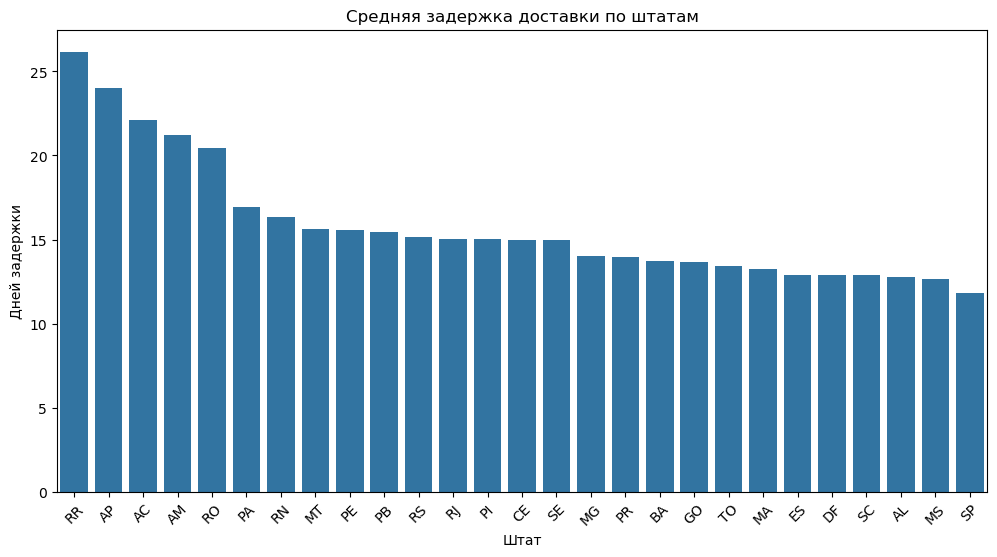

In [110]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=state_delays,
    x='customer_state',
    y='mean_delay',
    order=state_delays.sort_values('mean_delay', ascending=False).customer_state
)
plt.title('Средняя задержка доставки по штатам')
plt.xlabel('Штат')
plt.ylabel('Дней задержки')
plt.xticks(rotation=45)
plt.show()

In [109]:
# Группируем по городам (только города с >100 заказами для репрезентативности)
city_delays = orders_with_delay.groupby(['customer_state', 'customer_city'], as_index=False).agg(
    mean_delay=('delivery_delay', 'mean'),
    median_delay=('delivery_delay', 'median'),
    order_count=('order_id', 'count')
).query('order_count > 100').sort_values('mean_delay', ascending=False)

# Топ-10 городов с наибольшими задержками
print(city_delays.head(10))

     customer_state   customer_city  mean_delay  median_delay  order_count
77               AM          manaus   20.693431          19.0          137
2923             RO     porto velho   19.157407          20.0          108
1905             PA           belem   16.857477          16.0          428
2676             RJ    belford roxo   16.461538          15.0          104
3164             RS     passo fundo   16.151786          16.0          112
2763             RJ  rio de janeiro   16.056658          14.0         6601
2724             RJ            mage   15.660377          14.5          106
2859             RN           natal   15.502463          15.0          203
2762             RJ  rio das ostras   15.492308          14.0          130
3072             RS        gravatai   15.153153          14.0          111


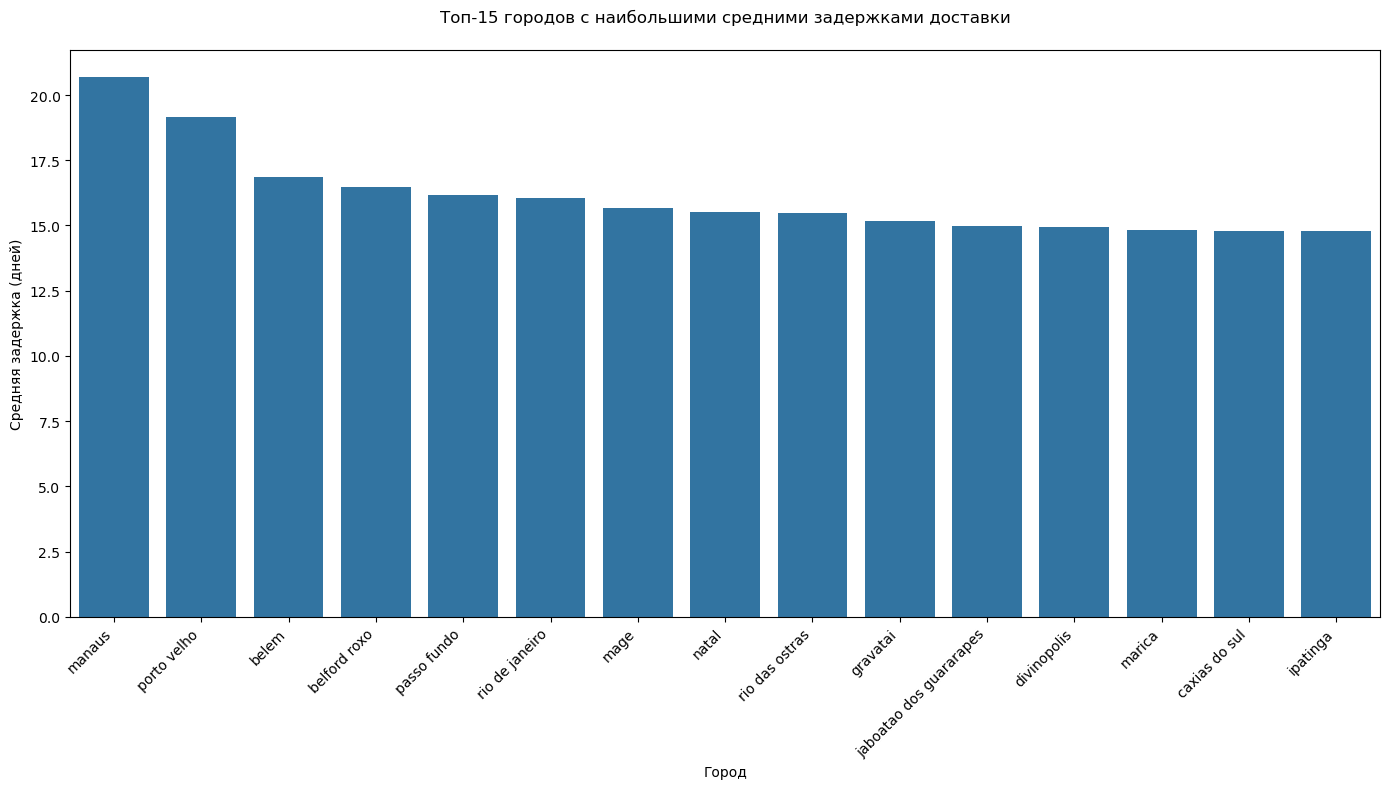

In [117]:
plt.figure(figsize=(14, 8))  # Увеличиваем размер для лучшего отображения названий городов

# Сортируем города по mean_delay и берем топ-15 для лучшей читаемости
top_cities = city_delays.sort_values('mean_delay', ascending=False).head(15)

# Создаем барплот с правильным порядком городов
sns.barplot(
    data=top_cities,
    x='customer_city',
    y='mean_delay', 
    order=top_cities['customer_city']  # Используем порядок из отсортированного DataFrame
)

plt.title('Топ-15 городов с наибольшими средними задержками доставки', pad=20)
plt.xlabel('Город')
plt.ylabel('Средняя задержка (дней)')
plt.xticks(rotation=45, ha='right')  # Наклон подписей для лучшей читаемости

plt.tight_layout()  # Подгоняем размеры
plt.show()

Анализ по штатам:
1. Наибольшие задержки наблюдаются в удалённых регионах:
- RR (Рорайма) - 26.2 дня (макс. задержка)
- AP (Амапа) - 24.0 дня
- AC (Акри) - 22.1 дня - логистические сложности в северных штатах с низкой плотностью населения.

2. Проблемные, но более населённые штаты:
- AM (Амазонас) - 21.2 дня
- RO (Рондония) - 20.4 дня - требуется оптимизация логистики в Амазонии.

3. Относительно высокие задержки в северо-восточных штатах:
- PA (Пара) - 16.9 дня
- PE (Пернамбуку) - 15.6 дня - проблемы инфраструктуры в крупных, но экономически слабых регионах.

Анализ по городам:
1. Абсолютный лидер:
- Манаус (AM) - 20.7 дней - крупнейший город Амазонии с изолированной логистикой.

2. Неожиданно высокие задержки в городах Рио-де-Жанейро:
- Бефорд-Роксо (RJ) - 16.5 дней
- Рио-де-Жанейро (RJ) - 16.1 дней - проблемы в густонаселённом регионе указывают на:
     - Перегруженность транспортной системы
     - Неэффективность локальных служб доставки

3. Другие проблемные города:
- Белем (PA) - 16.9 дней
- Натал (RN) - 15.5 дней - региональные центры с недостаточным логистическим покрытием.



# order_items-товарные позиции, входящие в заказы


order_id — уникальный идентификатор заказа (номер чека)

order_item_id — идентификатор товара внутри одного заказа

product_id — ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date — максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price — цена за единицу товара

freight_value — вес товара

In [41]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [42]:
# Определим размер датафрейма и проверим типы данных
print(f'shape: {order_items.shape}')
print(order_items.dtypes)

shape: (112650, 7)
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


Даты считались некорректно, отформатируем их в тип данных дата

In [43]:
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date)

In [44]:
# Проверим наличие пропусков
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [86]:
# Проверим число уникальных значений
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

Определим самые популярные товары

In [87]:
order_items.groupby('product_id', as_index=False)\
            .agg(order_cnt=('order_id', pd.Series.nunique))\
            .sort_values('order_cnt', ascending=False)

,product_id,order_cnt
19742,99a4788cb24856965c36a24e339b6058,467
22112,aca2eb7d00ea1a7b8ebd4e68314663af,431
8613,422879e10f46682990de24d770e7f83d,352
27039,d1c427060a0f73f6b889a5c7c61f2ac4,323
7364,389d119b48cf3043d311335e499d9c6b,311
...,...,...
32944,fff28f91211774864a1000f918ed00cc,1
32943,fff1059cd247279f3726b7696c66e44e,1
32939,ffeb228c521d5464d1f71444da96c446,1
32938,ffe9468f4d890db80b7231e86931ff37,1


Определим средний чек и среднее число позиций в заказе

In [95]:
order_items.groupby('order_id', as_index=False) \
           .agg({'order_item_id': 'max', 'price': 'sum'}) \
           .rename(columns={'order_item_id': 'item_cnt', 'price': 'order_total'})\
           .sort_values('order_total', ascending=False)

,order_id,item_cnt,order_total
1455,03caa2c082116e1d31e67e9ae3700499,8,13440.00
44467,736e1922ae60d0d6a89247b851902527,4,7160.00
3130,0812eb902a67711a1cb742b3cdaa65ae,1,6735.00
98298,fefacc66af859508bf1a7934eab1e97f,1,6729.00
94439,f5136e38d1a14a4dbd87dff67da82701,1,6499.00
...,...,...,...
21805,38bcb524e1c38c2c1b60600a80fc8999,1,2.90
89758,e8bbc1d69fee39eee4c72cb5c969e39d,1,2.29
93208,f1d5c2e6867fa93ceee9ef9b34a53cbf,1,2.20
24174,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,0.85


In [96]:
order_items.groupby('order_id', as_index=False) \
           .agg({'order_item_id': 'max', 'price': 'sum'}) \
           .rename(columns={'order_item_id': 'item_cnt', 'price': 'order_total'})\
           .sort_values('order_total', ascending=False).describe()

,item_cnt,order_total
count,98666.000000,98666.000000
mean,1.141731,137.754076
std,0.538452,210.645145
min,1.000000,0.850000
25%,1.000000,45.900000
50%,1.000000,86.900000
75%,1.000000,149.900000
max,21.000000,13440.000000


Медианный чек составляет 86.9, обычно в заказе 1 позиция, что характерно для пробных заказов

# 1. Оцениваем месячный retention в оформление заказа с помощью когортного анализа. 
Для анализа учитываем только доставленные заказы, так как они отражают успешные транзакции.

In [119]:
# Фильтруем только доставленные заказов
delivered_orders = orders.query("order_status== 'delivered'").copy()

In [120]:
# Объединяем таблицу с информацией о доставленных заказах с таблицей с информацией о клиентах
# по общему ключу customer_id-позаказный идентификатор пользователя
orders_with_customers = delivered_orders.merge(customers, on='customer_id')
orders_with_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [121]:
# Извлекаем месяц и день заказа
orders_with_customers['order_period'] = orders_with_customers['order_purchase_timestamp'].dt.to_period('M')
orders_with_customers['order_period_day']=orders_with_customers['order_purchase_timestamp'].dt.to_period('D')

In [122]:
# Присваиваем когорты на основе даты первого действия для каждого пользователя
orders_with_customers['cohort']=orders_with_customers.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
orders_with_customers['cohort_day']=orders_with_customers.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')
orders_with_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period,order_period_day,cohort,cohort_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02,2017-09,2017-09-04
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07-24,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08-08,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11-18,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018-02-13,2018-02,2018-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03,2017-03-09,2017-03,2017-03-09
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,2018-02-06,2018-02,2018-02-06
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,2017-08-27,2017-08,2017-08-27
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,2018-01-08,2018-01,2018-01-08


In [123]:
# Рассчитываем номер периода в днях (месячные периоды, деля на 30)
orders_with_customers['period_number_month']=np.floor((orders_with_customers.order_period_day-orders_with_customers.cohort_day).apply(attrgetter('n'))/30)
orders_with_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period,order_period_day,cohort,cohort_day,period_number_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02,2017-09,2017-09-04,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07-24,2018-07,2018-07-24,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08-08,2018-08,2018-08-08,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11-18,2017-11,2017-11-18,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018-02-13,2018-02,2018-02-13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03,2017-03-09,2017-03,2017-03-09,0.0
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,2018-02-06,2018-02,2018-02-06,0.0
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,2017-08-27,2017-08,2017-08-27,0.0
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,2018-01-08,2018-01,2018-01-08,0.0


In [124]:
# Агрегируем данные по когортам и рассчитанному номеру периода (в месяцах)
df_cohort_month=orders_with_customers.groupby(['cohort', 'period_number_month']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index()
df_cohort_month

,cohort,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1
...,...,...,...
210,2018-06,1.0,22
211,2018-06,2.0,6
212,2018-07,0.0,5949
213,2018-07,1.0,6


In [125]:
# Создаем сводную таблицу для когортного анализа
cohort_pivot=df_cohort_month.pivot_table(index='cohort', columns='period_number_month', values='n_customers')
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# Рассчитываем размеры когорт (первый столбец сводной таблицы)
cohort_size=cohort_pivot.iloc[:,0]
cohort_size

cohort
2016-09       1.0
2016-10     262.0
2016-12       1.0
2017-01     717.0
2017-02    1628.0
2017-03    2503.0
2017-04    2256.0
2017-05    3451.0
2017-06    3037.0
2017-07    3752.0
2017-08    4057.0
2017-09    4004.0
2017-10    4328.0
2017-11    7060.0
2017-12    5338.0
2018-01    6842.0
2018-02    6288.0
2018-03    6774.0
2018-04    6582.0
2018-05    6506.0
2018-06    5878.0
2018-07    5949.0
2018-08    6144.0
Freq: M, Name: 0.0, dtype: float64

In [127]:
# Вычисляем коэффициенты удержания, деля на размер когорты
retention_matrix=cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
# Определяем медианный retention 1-го месяца
median_first_month_retention = retention_matrix[1].median()
print(f"Медианный retention 1-го месяца: {median_first_month_retention:.2%}")

Медианный retention 1-го месяца: 0.35%


In [129]:
best_cohort = retention_matrix[3].idxmax()
best_retention = retention_matrix[3].max()
print(f"Когорта с самым высоким retention на 3-й месяц: {best_cohort} с retention {best_retention:.2%}")

Когорта с самым высоким retention на 3-й месяц: 2017-01 с retention 0.56%


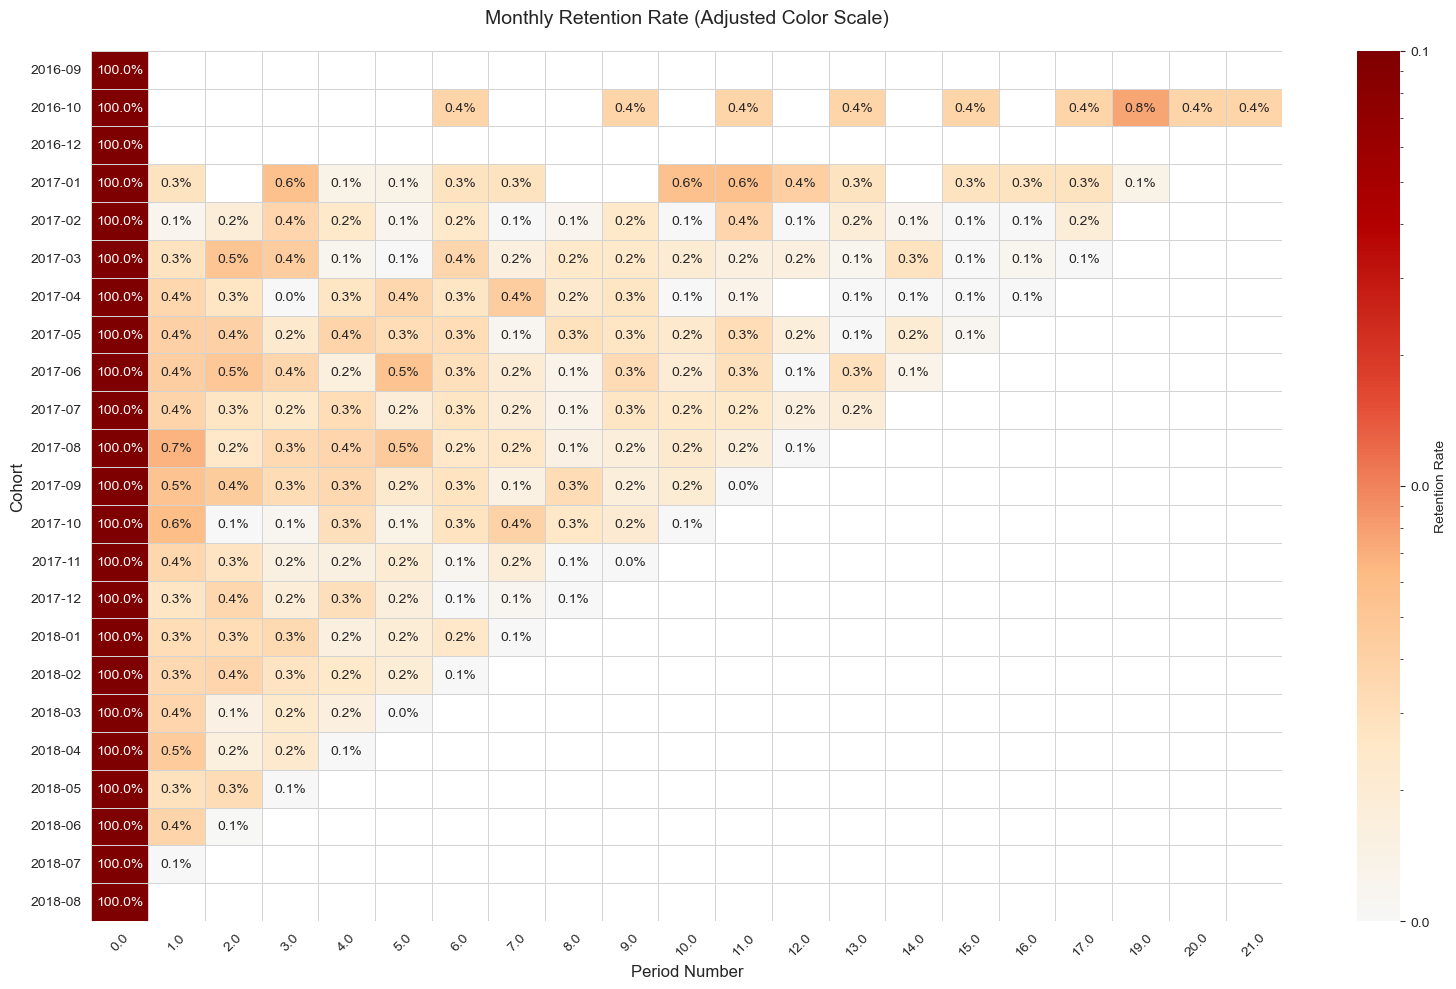

In [135]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(16, 10))
    
    
    
    sns.heatmap(
        retention_matrix,
        mask=retention_matrix.isnull(),
        annot=True,
        fmt='.1%',  # 1 знак после запятой для аннотаций
        cmap=cmap,
        norm=norm,
        cbar_kws={
            'label': 'Retention Rate',
            'format': '%.1f'  # Формат для подписей
        },
        linewidths=0.5,
        linecolor='lightgray'
    )
    
    plt.title('Monthly Retention Rate (Adjusted Color Scale)', pad=20, fontsize=14)
    plt.xlabel('Period Number', fontsize=12)
    plt.ylabel('Cohort', fontsize=12)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

Таким образом, при расчёте retention для отражения успешных транзакций были 
проанализированы данные со статусом 'доставлен пользователю', на выходе получаем:

- медианный retention 1-го месяца: 0.35%, 

- самый высокий retention 3 месяца зафиксирован в январе 2017 года и составляет 
0.56%

Эти данные свидетельствуют крайне низкой заинтересованности и высоком оттоке ЦА

# 2. Определяем, существует ли product/market fit у маркетплейса.

Проверим, насколько продукт соответствует ожиданиям клиента 

In [22]:
# Анализ распределения количества заказов на пользователя
orders_per_user = orders_with_customers.groupby('customer_unique_id')['order_id'].nunique()
orders_per_user.value_counts(normalize=True)

1     0.969997
2     0.027561
3     0.001939
4     0.000300
5     0.000096
6     0.000054
7     0.000032
15    0.000011
9     0.000011
Name: order_id, dtype: float64

In [23]:
# Проверяем повторные заказы
repeat_customers = orders_with_customers.groupby('customer_unique_id')['order_id'].nunique()
print(f"Доля пользователей с >1 заказом: {(repeat_customers > 1).mean():.2%}")

Доля пользователей с >1 заказом: 3.00%


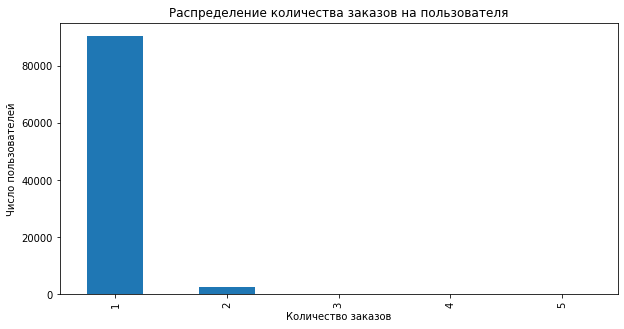

In [24]:
plt.figure(figsize=(10, 5))
orders_per_user.value_counts().head(5).plot(kind='bar')
plt.title('Распределение количества заказов на пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Число пользователей')
plt.show()

Проанализировав отчеты глобального аналога - Amazon, если 
доля пользователей с >1 заказом <10% - это критически низкий показатель. 
Учитывая, что 97% пользователей не делает заказ более 1 раза, это означает,
что продукт клиентов не удерживает.
Возможные причины:
- клиентов не устраивает качество товаров или соотношение цена/качество;
- клиентов не устраивает доставка;
- проблема в работе маркетплейса
    
Вывод о product/market fit:

1. Критически низкие показатели удержания:
- Только 3% пользователей совершают более 1 заказа (при пороговом значении 10% для здорового бизнеса)
- 97% клиентов не возвращаются после первой покупки
- Retention rate падает до 0.3% уже в первый месяц и практически нулевой на второй месяц

2. Ключевые проблемы:
- Качество товаров/сервиса: Низкая доля повторных покупок указывает на несоответствие ожиданиям
- Доставка: Возможные проблемы со сроками или качеством (подтверждается анализом задержек)
- Ценность предложения: Недостаточная дифференциация от конкурентов

3. Парадокс привлечения:
- Стабильный поток новых клиентов (медиана 4057 в месяц) показывает хорошую маркетинговую эффективность
- Однако "утекающее ведро" - клиенты не задерживаются в системе

4. Рекомендации:
- Повышение качества товаров (чек-листы для продавцов),
- Улучшение логистики (сроки и надежность доставки),
- Программа лояльности для повторных покупок,
- Персонализированные рекомендации,
- Упрощение процесса возврата

Заключение:

Маркетплейс демонстрирует слабый product/market fit. Хотя платформа успешно привлекает новых клиентов, катастрофически низкие показатели удержания (на 80% хуже порогового значения) свидетельствуют о системных проблемах в ценностном предложении. Требуется срочная оптимизация ключевых точек взаимодействия с клиентом, особенно постпокупного опыта.

# 3. Определение 5 основных метрик, на которых можно сконцентрироваться, чтобы максимизировать прибыль компании.
Необходимо определить следующие метрики:

    1. рост объема продаж маркетплейса;
    
    2. объем аудитории, которой продукт доставляет ценность;
    
    3. заинтересованность новых клиентов в продукте;
    
    4. вовлеченность клиента в продолжение использования продукта;
    
    5. денежное выражение вовлеченности клиента.

3.1 Метрика роста объема продаж - валовой объем товаров - GMV

Она измеряет общий объем продаж в денежном выражении  является основным
индикатором роста бизнеса и показывает, насколько успешно маркетплейс привлекает покупателей и генерирует доход.

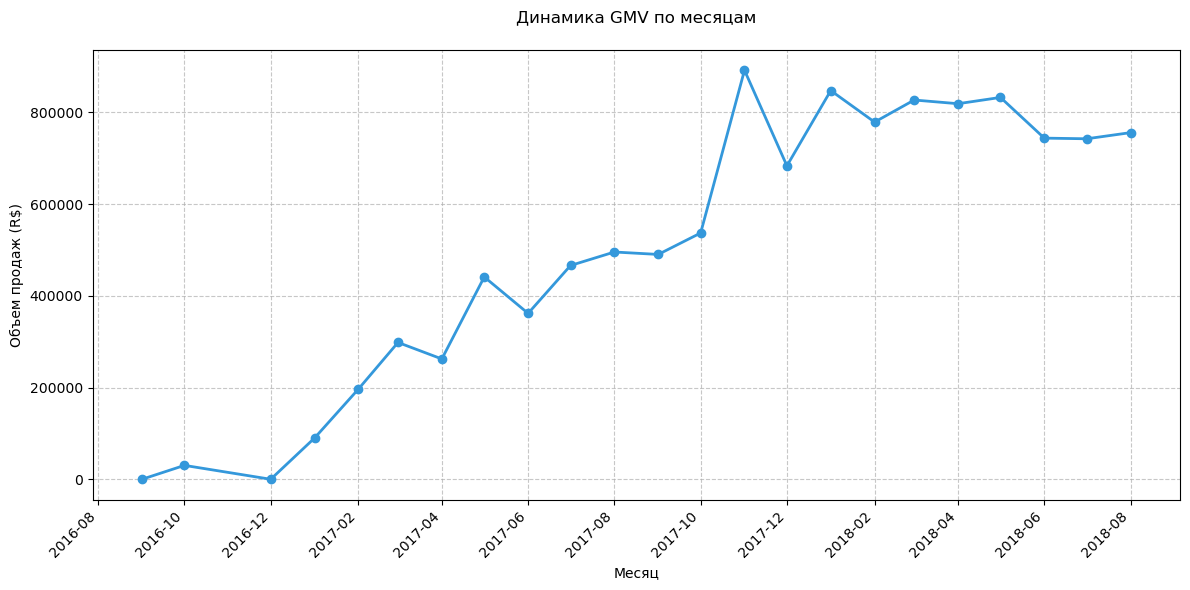

In [143]:
# Расчет GMV по месяцам
gmv = orders_with_customers.merge(order_items, on='order_id').groupby(
    orders_with_customers['order_purchase_timestamp'].dt.to_period('M')
)['price'].sum()

# Конвертируем PeriodIndex в DateTime для правильного отображения
gmv.index = gmv.index.to_timestamp()

plt.figure(figsize=(12, 6))
gmv.plot(kind='line',  # Изменено на линейный график
         color='#3498db', 
         marker='o',  # Добавляем маркеры для точек
         linewidth=2)  # Толщина линии

plt.title('Динамика GMV по месяцам', pad=20)
plt.xlabel('Месяц')
plt.ylabel('Объем продаж (R$)')
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Улучшаем подписи дат
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Подписи каждые 2 месяца
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

3.2 Метрика объема аудитории, которой продукт доставляет ценность - 
ежемесячные активные пользователи - MAU

Эта метрика считает уникальных пользователей, которые совершили хотя бы одно 
действие(просмотр, добавление в корзину, покупка) и показывает
реальный охват продукта

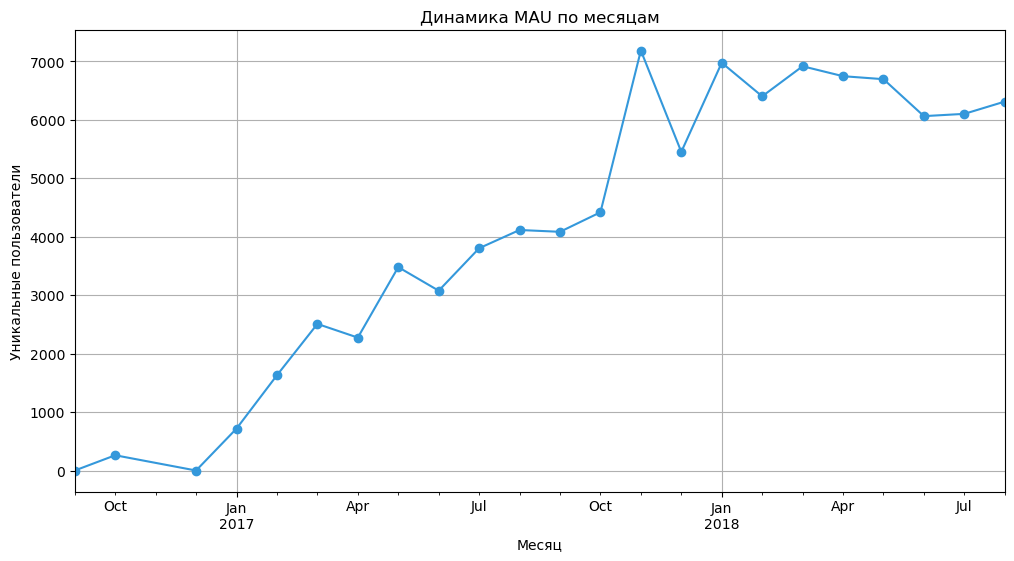

In [146]:
# Расчет MAU
mau = orders_with_customers.groupby(
    orders_with_customers['order_purchase_timestamp'].dt.to_period('M')
)['customer_unique_id'].nunique()

plt.figure(figsize=(12, 6))
mau.plot(kind='line', marker='o', color='#3498db')
plt.title('Динамика MAU по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Уникальные пользователи')
plt.grid()
plt.show()

3.3 Метрика заинтересованности новых клиентов в продукте - Conversion Rate (CR) 

Коэффициент конверсии, за счёт которого можно:

- определить целевое действие (регистрация),
    
- оценить эфективность рекламных кампаний и каналов маркетинга, 
    
- измерить эффективность маркетплелйса и его способность конвертировать посетителей в покупателей

In [147]:
# Расчет CR как доли пользователей, сделавших ≥1 заказ
total_users = customers['customer_unique_id'].nunique()  # Всего уникальных пользователей
paying_users = orders_with_customers['customer_unique_id'].nunique()  # Уникальные покупатели

cr = (paying_users / total_users) * 100  # В процентах
print(f"Конверсия в первый заказ: {cr:.2f}%")

Конверсия в первый заказ: 97.15%


3.4 Метрика вовлеченности клиента в продолжение использования продукта - Retention Rate - относительный показатель – показывает процент клиентов, которые продолжают использовать продукт после первого месяца. Она помогает понять, насколько хорошо продукт удерживает клиентов и удовлетворяет их потребности. Выразим его через активность при повторных покупках

In [148]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


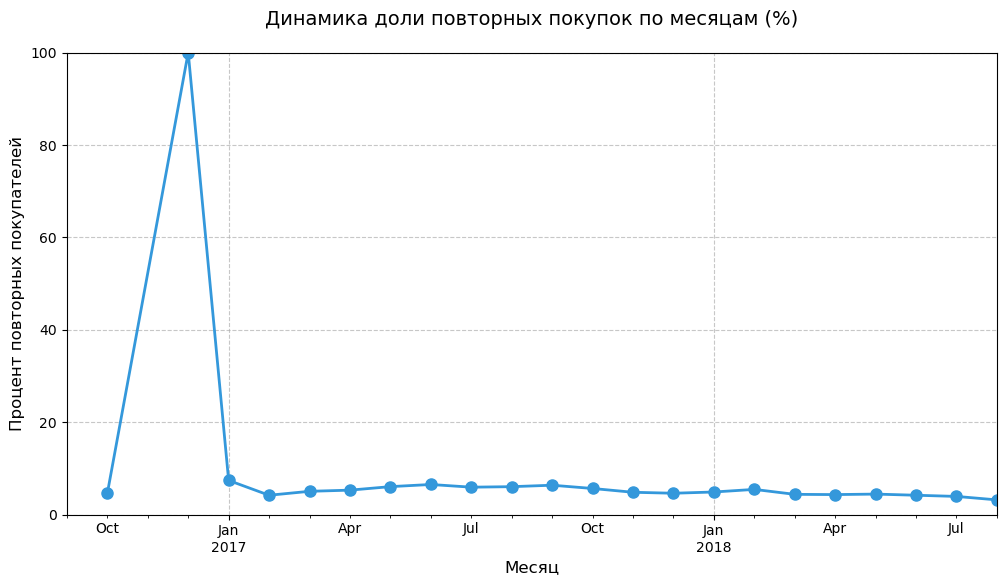

In [151]:
# Расчет доли повторных покупок
repeat_customers = orders_with_customers.groupby('customer_unique_id').filter(lambda x: len(x) > 1)
repeat_rate = repeat_customers.groupby(
    repeat_customers['order_purchase_timestamp'].dt.to_period('M')
)['customer_unique_id'].nunique() / mau * 100

plt.figure(figsize=(12, 6))
repeat_rate.plot(kind='line', 
                color='#3498db',  
                marker='o',       
                markersize=8,    
                linewidth=2)      

plt.title('Динамика доли повторных покупок по месяцам (%)', pad=20, fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Процент повторных покупателей', fontsize=12)
plt.ylim(0, 100)  # Ограничиваем ось Y от 0 до 100%
plt.grid(axis='both', linestyle='--', alpha=0.7)  # Сетка по обеим осям

plt.show()

3.5 Метрика денежного выражения вовлеченности клиента - ARPPU
(Average Revenue Per Paying User) – отражает общую выручку, которую компания получает с одного клиента в среднем. 

In [29]:
orders_with_revenue = orders_with_customers.merge(order_items, on='order_id')

#ARPPU по месяцам
arppu_monthly = orders_with_revenue.groupby(
    orders_with_revenue['order_purchase_timestamp'].dt.to_period('M')
).apply(
    lambda x: x['price'].sum() / x['customer_unique_id'].nunique()
)
#средний ARPPU за весь период 
total_revenue = orders_with_revenue['price'].sum()
paying_users = orders_with_revenue['customer_unique_id'].nunique()
avg_arppu = total_revenue / paying_users

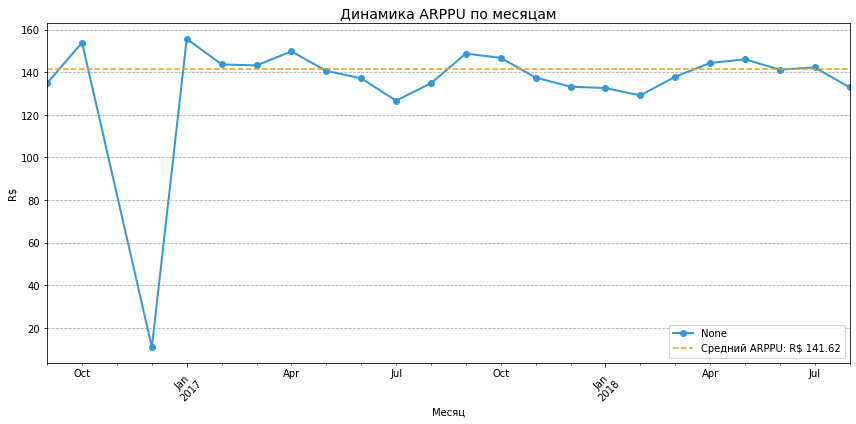

In [30]:
plt.figure(figsize=(12, 6))
arppu_monthly.plot(kind='line', marker='o', color='#3498db', linewidth=2)
plt.axhline(y=avg_arppu, color='#f39c12', linestyle='--', label=f'Средний ARPPU: R$ {avg_arppu:.2f}')
plt.title('Динамика ARPPU по месяцам', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('R$')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

Были определены 5 метрик:
    
 - GMV;
    
 - MAU;
    
 - Conversion Rate;
    
 - Retention Rate;
    
 - ARPPU 
    
   Анализ которых выявил противоречивую динамику: высокая конверсия в первый заказ (CR=97%) свидетельствует об эффективности первичного вовлечения и низком барьере первой покупки.

Критически низкие показатели удержания:
    
Retention Rate на уровне 0.35% указывает на массовый отток после первого заказа
Доля повторных покупок (3%) в 30 раз ниже рыночных норм (20-40%).
ARPPU демонстрирует стагнацию, что говорит о неэффективности стратегий

Вывод:
 - клиенты не видят ценности для повторног взаимодействия, требуется срочная работа над качеством работы сервиса, качеством товаров

Рекомендуется:

- провести опрос среди покупателей, ввести программу лояльности при её отсутствии или оптимизировать при наличии, ввести триггер (например, бонусная карта или скидка при повторном заказе
                                                           
 Также, анализ GMV и MAU выявил критическую точку перелома в ноябре 2017 года.
До пика - стабильный рост, после - снижение роста и отсутствие динамики.
                                                           


# 4. Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.

Сформулированные гипотезы:

1.Если исправим баг в системе процессинга заказов, то клиентам не придётся 
сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных
заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

2.Если сократим время до отгрузки заказа, то клиенты перестанут получать свой
заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт
повторных заказов. 

3.Если создадим новый способ оплаты, который будет конвертировать клиентов в 
повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа,
вследствие чего количество заказов увеличится за счёт повторных заказов тех, 
кто раньше не делал повторный заказ.

Задача: рассчитать Impact и ICE по каждой гипотезе

In [152]:
hypotheses_df = pd.DataFrame(
    {
        'Гипотеза': [
            'Исправление бага в системе процессинга заказов',
            'Сокращение времени до отгрузки заказа',
            'Создание нового способа оплаты'
        ],
        'Impact': [0, 0, 0],
        'Confidence': [8, 10, 5],
        'Ease': [6, 4, 9],
        'ICE': [0, 0, 0]
    },
    index=range(1, 4)  
)
hypotheses_df

,Гипотеза,Impact,Confidence,Ease,ICE
1,Исправление бага в системе процессинга заказов,0,8,6,0
2,Сокращение времени до отгрузки заказа,0,10,4,0
3,Создание нового способа оплаты,0,5,9,0


Для перевода в Impact задана следующая шкала:

In [153]:
impact_scale = [
    (0, 50),      
    (51, 150),    
    (151, 350),   
    (351, 750),   
    (751, 1550),  
    (1551, 3150), 
    (3151, 6350), 
    (6351, 12750),
    (12751, 25550),
    (25551, 51150)] 

Из расчёта Impact исключим данные по май 2017 года включительно, когда продукт лишь выходил на проектные мощности.

In [154]:
total_orders=customers.merge(orders, on='customer_id')

In [181]:
def value_to_impact(value):
    for i, (min_val, max_val) in enumerate(impact_scale, start=1):
        if min_val <= value <= max_val:
            return i

In [182]:
total_orders=total_orders[total_orders['order_purchase_timestamp'] >= '2017-06-01']
total_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


4.1. Гипотеза: Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен

In [183]:
total_total_orders=len(total_orders)
print(f"Всего заказов: {total_total_orders}")

Всего заказов: 87746


In [184]:
# Отмененные заказы
canceled_orders=total_orders.query("order_status=='canceled' or  order_status=='unavailable'")
canceled_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaT,NaT,2018-06-05
378,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,NaT,NaT,2018-03-06
380,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,NaT,NaT,2017-06-30
383,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaT,NaT,2018-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...
98746,ef775ae2f3b831b79dd2e9bcf77bfb06,46c0a00dac020d24bfdfbc8b214d54de,27150,barra do pirai,RJ,1cd8d1567debd198821fe9d46d99b5b1,canceled,2017-09-25 20:16:38,2017-09-25 20:28:20,NaT,NaT,2017-10-20
98786,d9335c099e6943d88ac5f8a7cb418b66,22af178809fa6887af2cc4f7d7bdc0bc,1218,sao paulo,SP,808c7c69c2778bdf4689eee0286e2bef,canceled,2018-02-22 07:57:07,2018-02-22 08:10:27,NaT,NaT,2018-03-13
99007,2034cc6d6d517007a9ba3e22ba643344,cb47d51801e7379766c5cd8ff623f37f,13052,campinas,SP,27d6012b882832dc9ddcf34304eeb77c,canceled,2017-11-11 10:44:49,2017-11-11 10:55:28,NaT,NaT,2017-11-27
99105,882b44646ab3f186597b1622a9443ff9,639b4096a4e5c96549a9bb495ca4871e,13972,itapira,SP,9b932dca249f9971b86dde2f2d7ad412,unavailable,2017-11-20 17:08:43,2017-11-20 17:26:54,NaT,NaT,2017-12-07


In [185]:
total_canceled=len(canceled_orders)
print(f"Всего отмененных заказов: {total_canceled}")

Всего отмененных заказов: 974


В число отмененных заказов входят заказы со статусом отменён и со статусом отменён по причине
недоступности товара. Отмены могли произойти пользователем, так и по причине бага.
В данной гипотезе багованными будем считать те заказы, которые будем считать тек заказы, кототрые
отменились, но были оплачены

In [186]:
# Фильтруем заказы, оставляем только те отменённые заказы, по которым прошла оплата 
canceled_orders_bag = canceled_orders.dropna(subset=['order_approved_at'])
canceled_orders_bag

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaT,NaT,2018-06-05
378,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,NaT,NaT,2018-03-06
380,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,NaT,NaT,2017-06-30
383,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaT,NaT,2018-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...
98746,ef775ae2f3b831b79dd2e9bcf77bfb06,46c0a00dac020d24bfdfbc8b214d54de,27150,barra do pirai,RJ,1cd8d1567debd198821fe9d46d99b5b1,canceled,2017-09-25 20:16:38,2017-09-25 20:28:20,NaT,NaT,2017-10-20
98786,d9335c099e6943d88ac5f8a7cb418b66,22af178809fa6887af2cc4f7d7bdc0bc,1218,sao paulo,SP,808c7c69c2778bdf4689eee0286e2bef,canceled,2018-02-22 07:57:07,2018-02-22 08:10:27,NaT,NaT,2018-03-13
99007,2034cc6d6d517007a9ba3e22ba643344,cb47d51801e7379766c5cd8ff623f37f,13052,campinas,SP,27d6012b882832dc9ddcf34304eeb77c,canceled,2017-11-11 10:44:49,2017-11-11 10:55:28,NaT,NaT,2017-11-27
99105,882b44646ab3f186597b1622a9443ff9,639b4096a4e5c96549a9bb495ca4871e,13972,itapira,SP,9b932dca249f9971b86dde2f2d7ad412,unavailable,2017-11-20 17:08:43,2017-11-20 17:26:54,NaT,NaT,2017-12-07


Теперь посмотрим, сколько потенциальных клиентов мы потеряли, т.е. найдем тех клиентов, для
которых заказ с багом был последним

In [187]:
# Последний заказ каждого пользователя
last_orders_1 = total_orders.sort_values('order_purchase_timestamp') \
                         .groupby('customer_id') \
                         .last() \
                         .reset_index()

In [188]:
# Соединяем с canceled_orders_bag, чтобы найти багнутые последние заказы
bugged_last_orders = pd.merge(
    last_orders_1,
    canceled_orders_bag[['order_id']],  
    on='order_id',
    how='inner')

In [189]:
#  Считаем количество уникальных пользователей с последним багнутым заказом
num_users_with_bugged_last_order = bugged_last_orders['customer_id'].nunique()
print(f"Количество пользователей, у которых последний заказ был багованным: {num_users_with_bugged_last_order}")

Количество пользователей, у которых последний заказ был багованным: 857


In [190]:
# Рассчитаем Impact
print(value_to_impact(857))

5


In [191]:
ice_1=5*8*6
ice_1

240

Тогда наша таблица после вычисления для первой гипотезы будет выглядеть следующим образом:

In [192]:
hypotheses_df = pd.DataFrame(
    {
        'Гипотеза': [
            'Исправление бага в системе процессинга заказов',
            'Сокращение времени до отгрузки заказа',
            'Создание нового способа оплаты'
        ],
        'Impact': [5, 0, 0],
        'Confidence': [8, 10, 5],
        'Ease': [6, 4, 9],
        'ICE': [240, 0, 0]
    },
    index=range(1, 4))
hypotheses_df

,Гипотеза,Impact,Confidence,Ease,ICE
1,Исправление бага в системе процессинга заказов,5,8,6,240
2,Сокращение времени до отгрузки заказа,0,10,4,0
3,Создание нового способа оплаты,0,5,9,0


4.2 Гипотеза: Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов. 

Нужно сократить время между order_purchase_timestamp( время создания заказа) и order_delivered_customer_date (время доставки заказа). Проверим, сколько заказов было доставлено с опозданием. ДЛя этого сравним обещанное и фактическое время доставки.

In [193]:
# Все заказы с опозданием
total_delayed=total_orders.query('order_estimated_delivery_date < order_delivered_customer_date')
total_delayed

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
33,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ,77b062be7c5bd21712905feb8e1cfeed,delivered,2017-06-14 18:31:54,2017-06-15 18:43:04,2017-06-22 08:11:38,2017-07-07 20:32:47,2017-07-07
59,a905baa530258422594f1b05615bd225,c80da60feddb7cf8325bd104032e314a,60140,fortaleza,CE,4f0695330f3816ef294bf1f4b18f4f2e,delivered,2018-03-29 21:28:04,2018-03-29 21:35:20,2018-04-12 23:36:29,2018-05-08 16:52:07,2018-04-23
89,6bed27564bd99d78d09c1fac13da56fd,463093247faa080167d77f2e6d1b297d,13321,salto,SP,0e5d9583490deb1e011b1c8e7da13398,delivered,2018-03-22 12:07:30,2018-03-22 12:15:45,2018-03-27 22:12:24,2018-05-09 19:48:38,2018-04-11
96,23e96758fd640560e9b1fbcda90abfc4,9e1f719fe5b17b9c51905fee6d6385c1,5565,sao paulo,SP,fb9a9bc9654c16364f348fb2309b1214,delivered,2018-04-02 08:54:48,2018-04-02 09:09:07,2018-04-11 22:08:39,2018-04-20 21:42:29,2018-04-19
...,...,...,...,...,...,...,...,...,...,...,...,...
99406,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,e65fa5f31ce4436d38bcf5e109fd43e4,delivered,2018-01-24 17:53:44,2018-01-24 18:12:41,2018-01-30 15:13:39,2018-02-20 17:48:37,2018-02-19
99417,b7c889215de76857c7967c1011125d2d,522e244a96d13876c5bac4985a8d5075,82410,curitiba,PR,1a9543c90f188e2e4fb14327ad4a9c9b,delivered,2018-01-30 15:28:21,2018-01-31 15:30:30,2018-02-16 16:28:33,2018-03-16 20:03:53,2018-03-13
99425,0a7db3996b88954c7aa763b5dd621d5b,15637b62dfa4c5a9df846b22beef0994,52090,recife,PE,d8b354d53fff40dcc80a7e64dbfc2878,delivered,2018-02-13 18:20:51,2018-02-13 18:30:31,2018-02-14 20:22:56,2018-03-29 20:26:42,2018-03-15
99429,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,2017-12-19 19:37:33,2017-12-12


In [194]:
# Все доставленные заказы с опозданием
delivered_delayed_delivery=total_orders.query("order_status=='delivered' and order_estimated_delivery_date<order_delivered_customer_date")
delivered_delayed_delivery

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
33,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ,77b062be7c5bd21712905feb8e1cfeed,delivered,2017-06-14 18:31:54,2017-06-15 18:43:04,2017-06-22 08:11:38,2017-07-07 20:32:47,2017-07-07
59,a905baa530258422594f1b05615bd225,c80da60feddb7cf8325bd104032e314a,60140,fortaleza,CE,4f0695330f3816ef294bf1f4b18f4f2e,delivered,2018-03-29 21:28:04,2018-03-29 21:35:20,2018-04-12 23:36:29,2018-05-08 16:52:07,2018-04-23
89,6bed27564bd99d78d09c1fac13da56fd,463093247faa080167d77f2e6d1b297d,13321,salto,SP,0e5d9583490deb1e011b1c8e7da13398,delivered,2018-03-22 12:07:30,2018-03-22 12:15:45,2018-03-27 22:12:24,2018-05-09 19:48:38,2018-04-11
96,23e96758fd640560e9b1fbcda90abfc4,9e1f719fe5b17b9c51905fee6d6385c1,5565,sao paulo,SP,fb9a9bc9654c16364f348fb2309b1214,delivered,2018-04-02 08:54:48,2018-04-02 09:09:07,2018-04-11 22:08:39,2018-04-20 21:42:29,2018-04-19
...,...,...,...,...,...,...,...,...,...,...,...,...
99406,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,e65fa5f31ce4436d38bcf5e109fd43e4,delivered,2018-01-24 17:53:44,2018-01-24 18:12:41,2018-01-30 15:13:39,2018-02-20 17:48:37,2018-02-19
99417,b7c889215de76857c7967c1011125d2d,522e244a96d13876c5bac4985a8d5075,82410,curitiba,PR,1a9543c90f188e2e4fb14327ad4a9c9b,delivered,2018-01-30 15:28:21,2018-01-31 15:30:30,2018-02-16 16:28:33,2018-03-16 20:03:53,2018-03-13
99425,0a7db3996b88954c7aa763b5dd621d5b,15637b62dfa4c5a9df846b22beef0994,52090,recife,PE,d8b354d53fff40dcc80a7e64dbfc2878,delivered,2018-02-13 18:20:51,2018-02-13 18:30:31,2018-02-14 20:22:56,2018-03-29 20:26:42,2018-03-15
99429,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,2017-12-19 19:37:33,2017-12-12


In [195]:
the_percentage_of_late_orders_delivered=round((len(delivered_delayed_delivery)/len(total_orders))*100,2)

In [196]:
print(f"Всего доставленных заказов с опозданием: {len(delivered_delayed_delivery)}")
print(f"Доля заказов, доставленных с опозданием: {the_percentage_of_late_orders_delivered}")


Всего доставленных заказов с опозданием: 7295
Доля заказов, доставленных с опозданием: 8.31


Теперь проверим, были ли отмены из-за опоздания

In [197]:
cancelled_delayed_order=total_orders.query("order_status=='canceled' and order_estimated_delivery_date<order_delivered_customer_date")
cancelled_delayed_order
# да, из-за отмены был отменен 1 заказ

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
50569,1bccb206de9f0f25adc6871a1bcf77b2,6a04c8339c44b23e189446216a494569,32071,contagem,MG,1950d777989f6a877539f53795b4c3c3,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09


In [198]:
# Время опоздания
total_delayed = total_delayed.copy()

total_delayed['delay_days'] = (total_delayed['order_delivered_customer_date'] - 
                              total_delayed['order_estimated_delivery_date'])
total_delayed['delay_days_t'] = (total_delayed['order_delivered_customer_date'] - 
                              total_delayed['order_estimated_delivery_date']).dt.days
total_delayed

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_days,delay_days_t
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1 days 17:58:51,1
33,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ,77b062be7c5bd21712905feb8e1cfeed,delivered,2017-06-14 18:31:54,2017-06-15 18:43:04,2017-06-22 08:11:38,2017-07-07 20:32:47,2017-07-07,0 days 20:32:47,0
59,a905baa530258422594f1b05615bd225,c80da60feddb7cf8325bd104032e314a,60140,fortaleza,CE,4f0695330f3816ef294bf1f4b18f4f2e,delivered,2018-03-29 21:28:04,2018-03-29 21:35:20,2018-04-12 23:36:29,2018-05-08 16:52:07,2018-04-23,15 days 16:52:07,15
89,6bed27564bd99d78d09c1fac13da56fd,463093247faa080167d77f2e6d1b297d,13321,salto,SP,0e5d9583490deb1e011b1c8e7da13398,delivered,2018-03-22 12:07:30,2018-03-22 12:15:45,2018-03-27 22:12:24,2018-05-09 19:48:38,2018-04-11,28 days 19:48:38,28
96,23e96758fd640560e9b1fbcda90abfc4,9e1f719fe5b17b9c51905fee6d6385c1,5565,sao paulo,SP,fb9a9bc9654c16364f348fb2309b1214,delivered,2018-04-02 08:54:48,2018-04-02 09:09:07,2018-04-11 22:08:39,2018-04-20 21:42:29,2018-04-19,1 days 21:42:29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99406,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,e65fa5f31ce4436d38bcf5e109fd43e4,delivered,2018-01-24 17:53:44,2018-01-24 18:12:41,2018-01-30 15:13:39,2018-02-20 17:48:37,2018-02-19,1 days 17:48:37,1
99417,b7c889215de76857c7967c1011125d2d,522e244a96d13876c5bac4985a8d5075,82410,curitiba,PR,1a9543c90f188e2e4fb14327ad4a9c9b,delivered,2018-01-30 15:28:21,2018-01-31 15:30:30,2018-02-16 16:28:33,2018-03-16 20:03:53,2018-03-13,3 days 20:03:53,3
99425,0a7db3996b88954c7aa763b5dd621d5b,15637b62dfa4c5a9df846b22beef0994,52090,recife,PE,d8b354d53fff40dcc80a7e64dbfc2878,delivered,2018-02-13 18:20:51,2018-02-13 18:30:31,2018-02-14 20:22:56,2018-03-29 20:26:42,2018-03-15,14 days 20:26:42,14
99429,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,2017-12-19 19:37:33,2017-12-12,7 days 19:37:33,7


In [199]:
total_delayed.delay_days.describe()

count                          7296
mean      9 days 03:48:23.841282894
std      11 days 21:39:55.371136838
min                 0 days 00:03:36
25%          1 days 20:52:46.750000
50%                 5 days 19:26:17
75%         11 days 19:06:49.750000
max               188 days 23:24:07
Name: delay_days, dtype: object

Среднее время опоздания доставки заказа к клиенту составляет 9 дней 3 часа 48 минут

Далее найдем количество пользователей, у которых опоздавшй заказ стал последним


In [200]:
# Последний заказ каждого клиента
last_orders_2=total_orders.sort_values('order_purchase_timestamp') \
    .groupby('customer_unique_id') \
    .last() \
    .reset_index()
last_orders_2

,customer_unique_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0000366f3b9a7992bf8c76cfdf3221e2,fadbb3709178fc513abc1b2670aa1ad2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4cb282e167ae9234755102258dd52ee8,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,2018-05-10 18:02:42,2018-05-15
2,0000f6ccb0745a6a4b88665a16c9f078,914991f0c02ef0843c0e7010c819d642,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,2017-11-01 21:23:05,2017-11-13
3,0004aac84e0df4da2b147fca70cf8255,47227568b10f5f58a524a75507e6992c,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,2017-11-27 23:08:56,2017-12-05
4,0004bd2a26a76fe21f786e4fbd80607f,4a913a170c26e3c8052ed0202849b5a8,5036,sao paulo,SP,3e470077b690ea3e3d501cffb5e0c499,delivered,2018-04-05 19:33:16,2018-04-05 19:48:59,2018-04-07 00:38:52,2018-04-07 16:12:43,2018-04-19
...,...,...,...,...,...,...,...,...,...,...,...,...
85014,fffbf87b7a1a6fa8b03f081c5f51a201,ed421f2bf6c0ea955e4ac8a5fe646b94,60055,fortaleza,CE,64397307c6954ae1ad2ad8e791ad8a31,delivered,2017-12-27 22:36:41,2017-12-27 22:47:44,2018-01-05 00:44:26,2018-01-15 19:39:13,2018-01-29
85015,fffcc512b7dfecaffd80f13614af1d16,a1746e37af49aa5afd6b195baed286eb,28909,cabo frio,RJ,158986977fa0c5043a8200b6b4563979,shipped,2018-04-11 00:34:32,2018-04-11 00:50:44,2018-04-11 20:41:54,NaT,2018-05-09
85016,fffcf5a5ff07b0908bd4e2dbc735a684,74be082247cd677a147d83ee670e9d53,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,2017-07-06 09:22:00,2017-08-02
85017,fffea47cd6d3cc0a88bd621562a9d061,0ecf8e0a08148af0bf313184f167670a,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,2018-01-09 22:28:20,2018-01-12


In [201]:
# Отбираем клиентов, у которых последний заказ был с задержкой
last_orders_2['delay_days_t'] = (last_orders_2['order_delivered_customer_date'] - 
                              last_orders_2['order_estimated_delivery_date']).dt.days
delayed_last_order = last_orders_2[
    (last_orders_2['delay_days_t'] > 0) & 
    (last_orders_2['order_status'] == 'delivered')]
delayed_last_order

,customer_unique_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_days_t
7,0005ef4cd20d2893f0d9fbd94d3c0d97,c59e8ff99836e90d8b457d4122dc34e9,65060,sao luis,MA,01b330808c5819a6a3cb79b72f0b8288,delivered,2018-03-12 15:22:12,2018-03-12 15:38:46,2018-03-13 16:07:27,2018-05-05 12:38:38,2018-04-04,31.0
22,0010fb34b966d44409382af9e8fd5b77,bb923a84f897c7ffc3d03eb905f7eddf,4321,sao paulo,SP,1fc81b1074b61a259529663946b10a32,delivered,2018-03-05 17:08:53,2018-03-06 18:30:38,2018-03-08 12:28:59,2018-03-28 16:39:11,2018-03-26,2.0
33,00196fdb2bf9edfc35e88ebfbcf8d781,c3d7323f3c6da4f6b1c1ab44328b2637,92323,canoas,RS,3e83ca3523a68abaf07131a5ecab7319,delivered,2018-02-22 19:06:44,2018-02-22 19:15:34,2018-02-23 22:41:35,2018-03-22 22:09:01,2018-03-21,1.0
52,002aba8c1af80acacef6e011f9f23262,a13cbaa8e1b1fffbfe0e01d938789f51,23860,mangaratiba,RJ,f407e662a10a7864e42c33fdc559ff0a,delivered,2018-02-27 12:47:48,2018-02-28 12:48:37,2018-03-02 16:51:44,2018-04-26 19:24:34,2018-03-28,29.0
55,002cdf87d4c03f08f7eb4551a923affc,8abfeeb7b843cfbc0f5844addf3a4880,13183,hortolandia,SP,952da942e2586c7131de1381aba049a3,delivered,2017-10-31 17:32:22,2017-10-31 18:31:10,2017-11-14 21:19:02,2017-11-30 20:03:57,2017-11-16,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84954,ffc9d8a98ebd09a78c8adb729c3cfa2a,a01b75a620854e00adb420daa4ceb4bb,96201,rio grande,RS,17b129bc47ae24191ca5670deaa170f5,delivered,2017-08-14 23:11:01,2017-08-15 00:05:10,2017-08-17 18:47:29,2017-09-19 15:00:41,2017-09-15,4.0
84970,ffd973d43cadfa3e60340bcad8d87696,d849f901a7b414b1c55da5052501f168,27321,barra mansa,RJ,b5645b72f0e1b78b622c8a6a4cc06371,delivered,2017-11-26 21:22:10,2017-11-26 21:33:17,2017-11-30 20:36:55,2017-12-20 22:28:13,2017-12-19,1.0
84997,ffec490ab531184a483efe2eedd68908,da108bc410acffb1400cf9caea65a332,79091,campo grande,MS,003a94f778ef8cfd50247c8c1b582257,delivered,2018-08-03 14:52:31,2018-08-03 15:05:14,2018-08-06 14:12:00,2018-08-24 00:18:38,2018-08-15,9.0
84999,ffeddf8aa7cdecf403e77b2e9a99e2ea,22a4b8a7912abc2b02051dca85e02564,68030,santarem,PA,b40d597f0eb58c117cb5d9e424f10426,delivered,2018-05-13 16:04:51,2018-05-13 16:15:16,2018-05-17 11:57:00,2018-06-19 20:16:35,2018-06-13,6.0


In [202]:
print(f"Число клиентов, которые потенциально могли бы совершить повторный заказ, если бы не задержка товара : {len(delayed_last_order)}")

Число клиентов, которые потенциально могли бы совершить повторный заказ, если бы не задержка товара : 5927


Примем, что конверсия в повторный заказ равна величине медианного retention 1-го месяца - 0.35% или 0.0035

In [206]:
print(f'Возможное количество повторных заказов: {round(len(delayed_last_order)*0.0035, 2)}')

Возможное количество повторных заказов: 20.74


In [207]:
# Рассчитаем Impact
print(value_to_impact(20.74))

1


In [208]:
ice_2=1*10*4
ice_2

40

In [210]:
hypotheses_df = pd.DataFrame(
    {
        'Гипотеза': [
            'Исправление бага в системе процессинга заказов',
            'Сокращение времени до отгрузки заказа',
            'Создание нового способа оплаты'
        ],
        'Impact': [5, 7, 0],
        'Confidence': [8, 10, 5],
        'Ease': [6, 4, 9],
        'ICE': [240, 40, 0]
    },
    index=range(1, 4)  
)
hypotheses_df

,Гипотеза,Impact,Confidence,Ease,ICE
1,Исправление бага в системе процессинга заказов,5,8,6,240
2,Сокращение времени до отгрузки заказа,7,10,4,40
3,Создание нового способа оплаты,0,5,9,0


4.3 Гипотеза: Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов тех, кто раньше не делал повторный заказ.

In [217]:
total_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


Очевидно, что новый способ оплаты будет актуален для тех пользователей, у кого заказ был
отменен из-за проблем с оплатой, т.е. в поле времени подтверждения оплаты значения будут отсутствовать

In [218]:
# Отмененные заказы из-за проблем с оплатой
canceled_payment_issues = total_orders[
    (total_orders['order_status'].isin(['canceled', 'unavailable'])) & 
    (total_orders['order_approved_at'].isna())]

Найдем последний заказ каждого пользователя с этой проблемой

In [219]:
# Последний заказ каждого клиента
last_orders_3 = total_orders.sort_values('order_purchase_timestamp') \
                         .groupby('customer_id') \
                         .last() \
                         .reset_index()

И находим пользователей, у которых последний заказ был отменён из-за оплаты

In [220]:
# Отбираем клиентов, у которых последний заказ был с проблемой оплаты
users_with_payment_issue_last_order = pd.merge(
    last_orders_3,
    canceled_payment_issues[['order_id']],
    on='order_id',
    how='inner')

In [221]:
num_users_affected = users_with_payment_issue_last_order['customer_id'].nunique()
print(f"Количество пользователей, у которых последний заказ был отменён из-за проблем с оплатой: {num_users_affected}")

Количество пользователей, у которых последний заказ был отменён из-за проблем с оплатой: 117


Примем, что конверсия в повторный заказ равна величине медианного retention 1-го месяца - 0.35% или 0.0035

In [223]:
print(f'Возможное количество повторных заказов: {round(num_users_affected*0.0035,2)}')

Возможное количество повторных заказов: 0.41


In [225]:
# Рассчитаем Impact
print(value_to_impact(0.41))

1


In [226]:
ice_3=1*5*9
ice_3

45

In [227]:
hypotheses_df = pd.DataFrame(
    {
        'Гипотеза': [
            'Исправление бага в системе процессинга заказов',
            'Сокращение времени до отгрузки заказа',
            'Создание нового способа оплаты'
        ],
        'Impact': [5, 7, 1],
        'Confidence': [8, 10, 5],
        'Ease': [6, 4, 9],
        'ICE': [240, 40, 45]
    },
    index=range(1, 4)  
)
hypotheses_df

,Гипотеза,Impact,Confidence,Ease,ICE
1,Исправление бага в системе процессинга заказов,5,8,6,240
2,Сокращение времени до отгрузки заказа,7,10,4,40
3,Создание нового способа оплаты,1,5,9,45


По итогам ICE-расчётов в первую очередь берём в работу гипотезу 1 - Исправление бага в системе процессинга заказов, затем после неё 3 и дальше 1.

5.Сформулировать нужные метрики, на которые гипотеза по сокращению времени до отгрузки заказа 
должна повлиять.

В качестве целевых метрик выбираем:

1. Количество доставленных заказов (Delivered Orders Count) - общее количество заказов, которые были успешно доставлены клиентам. Оценивает, увеличилось ли количество успешных доставок после исправления бага. Это основная метрика, которая непосредственно отражает успех гипотезы.
- метрика чувстительна -
   - Прямая количественная оценка: показывает абсолютный прирост доставок, а не относительный (в отличие от конверсии)и быстро реагирует на изменения: если исправление бага устранило проблему, рост будет виден уже в следующий отчетный период.
   - Сегментирование для глубины анализа: Можно разбить по: периодам (до/после исправления), регионам (где были проблемы с доставкой), категориям товаров (например, хрупкие/габаритные).
- метрика достоверна - Основана на объективных данных: учитывает только факт доставки (статус delivered), без субъективных факторов.
- метрика интерпретируема - связь с бизнес-результатами: больше доставок = больше удовлетворенных клиентов = рост выручки и лояльности.

Пример целевого значения:
После оптимизации логистики количество доставленных заказов выросло с 10 000 до 12 000 в месяц (+20%). Это означает, что исправление бага предотвратило потерю ~2 000 заказов ежемесячно, что эквивалентно +1 млн R$ выручки (при среднем чеке 500)

В качестве прокси-метрик выбираем:

1. Конверсия в доставку товара до покупателя (Delivery Conversion Rate) - общее количество заказов, которые были доставлены клиентам / общее количество заказов - измеряет, насколько эффективно маркетплейс доводит заказы до клиентов. После исправления бага (например, улучшения логистики или устранения ошибок в системе) рост этой метрики покажет, что уменьшилось количество отмен и невыполненных заказов.
   
- метрика чувствительна - прямая реакция на изменения: если исправление бага действительно улучшило процесс (например, уменьшило количество отмен из-за недоступности товара), метрика быстро это отразит.
- метрика достоверна - основана на фактах: учитывает только завершенные транзакции (доставлено/не доставлено), а не субъективные оценки клиентов.
- интерпретируемость - прямая связь с прибылью: чем выше конверсия, тем больше заказов завершается успешно - больше выручки.

Пример прокси-значения:
- До исправления: 85% заказов доставлялись (15% терялись из-за ошибок).
- После исправления: 95% доставок - +10% завершенных заказов = +X% выручки (зависит от среднего чека).

В качестве guardrail метрик (Guardrail-метрика — это показатель, который контролирует побочные эффекты изменений. Он не измеряет успех гипотезы напрямую, но защищает от негативного влияния на пользовательский опыт) выбираем:

1. Конверсия в оформление заказа (Checkout Conversion Rate) - доля клиентов, которые оформили заказ, деленная на количество активной аудитории. Метрика позволит убедиться, что исправление бага не негативно сказалось на общем восприятии клиента совершить следующий заказ.

    - метрика чувствительна - чувствительность к UX-изменениям: любые ошибки в интерфейсе (например, сломанная кнопка оплаты) сразу снизят конверсию.
      
    - метрика достоверна - оценивает насколько устойчива к внешним шумам и точно отражает проблему, считается по фактческим действиям (оформленные заказы / активные пользователи).
    
    - метрика интерпретируема - прямая связь с прибылью: падение конверсии на 1% = потеря N заказов (зависит от трафика). Например: 100 000 активных пользователей - при конверсии 5% = 5 000 заказов, если конверсия упала до 4% - -1 000 заказов/месяц. При среднем чеке 500 R$ → потеря 500 000 R/месяц.
    
Пример:

После обновления дизайна:

Конверсия упала с 5.2% до 4.7% - команда быстро локализовала баг (не работала кнопка "Промокод") и откатила изменения.

6. Вывод по результатам работы

Анализ данных маркетплейса выявил следующие ключевые проблемы:

Крайне низкий Retention Rate:

Медианный retention первого месяца составляет всего 0.35%, а максимальный retention на 3-й месяц (0.56%) был зафиксирован в январе 2017 года. Это свидетельствует о массовом оттоке пользователей после первого заказа.

Доля пользователей с повторными заказами (более 1 заказа) составляет всего 3%, что критически ниже рыночных норм (20-40%). Это указывает на отсутствие долгосрочной вовлеченности клиентов.

Отсутствие Product/Market Fit:

97% пользователей совершают только один заказ, что говорит о несоответствии продукта ожиданиям клиентов. 
Возможные причины:

- Низкое качество товаров или несоответствие цены и качества.

- Проблемы с доставкой (задержки, плохой сервис).

- Неудовлетворительная работа платформы (например, сложный интерфейс или отсутствие удобных способов оплаты).

Метрики для максимизации прибыли компании:

Были предложены следующие метрики:

- GMV - для отслеживания роста оъема продаж;
    
- MAU - для отслеживания объема аудитории, которой продукт доставляет ценность;
    
- Conversion Rate - для отслеживания заинтересованности новых клиентов в продукте;
    
- Retention Rate - для отслеживания вовлеченности клиента в продолжение использования продукта;
    
- ARPPU - для денежного выражения вовлеченности клиента

В ходе исследования было обнаружено, что, несмотря на высокий уровень конверсии в первый заказ (Conversion Rate=97,15%), показатели GMV и MAU начали снижаться и после, динамика прекратила меняться  после ноября 2017 года, после медленного роста, что может свидетельствовать об утрате интереса пользователей.

Retention Rate (вовлеченность в продолжение использование продукта) и напрямую связанный с ним ARPPU (средний доход с платящего пользователя) демонстрирует стагнацию, что подтверждает неэффективность текущих стратегий монетизации.

Выявлено несколько возможных факторов, которые могли привести к значительному оттоку пользователей:

- Баги в системе процессинга заказов, из-за которого отменялись оплаченные заказы ;
- Крайне высокие задержки заказов;
- Проблемы с проведением оплаты.

С помощью фреймворка ICE было рассмотрено эти 3 фактора как гипотезы и была выбрана наиболее перспективная гипотеза

In [228]:
hypotheses_df

,Гипотеза,Impact,Confidence,Ease,ICE
1,Исправление бага в системе процессинга заказов,5,8,6,240
2,Сокращение времени до отгрузки заказа,7,10,4,40
3,Создание нового способа оплаты,1,5,9,45


Согласно расчётам, этой гипотезой оказалась гипотеза под номером 1 - Исправление бага в системе процессинга заказов	


Для мониторинга влияния внедрения гипотезы в работу были предложены следующие метрики:

Целевые метрики:

- Количество доставленных заказов (Delivered Orders Count)

Прокси-метрика:

- Конверсия в доставку товара до покупателя (Delivery Conversion Rate)

Guardrail метрика:

- Конверсия в оформление заказа (Checkout Conversion Rate)

Советы по улучшению продукта:

1. Провести исследование среди пользователей, чтобы выявить причины оттока клиентов. Это поможет понять, что именно не устраивает покупателей и как можно улучшить сервис.

2. Оптимизировать процесс доставки. Сократить время отгрузки и улучшить логистику.

3. Внедрить программы лояльности. Например, предлагать бонусы, скидки или кэшбэк за повторные покупки. Также можно использовать персональные предложения и напоминания о неиспользованных бонусах.

4. Усовершенствовать работу программы и устранить ошибки на сайте. Это поможет снизить барьер для повторных покупок. 

5. Регулярно отслеживать ключевые метрики. Например, GMV, MAU, Retention Rate и ARPPU. Это поможет оценить эффективность изменений.

6. Провести A/B-тестирование новых функций. 

7. Улучшить контроль качества товаров и взаимодействие с продавцами. Это повысит удовлетворённость клиентов.